In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

## Deep Learning

In [2]:
# Carregando base de dados e dividindo entre treino e teste
(X_training, y_training), (X_test, y_test) = mnist.load_data()

Text(0.5, 1.0, '4')

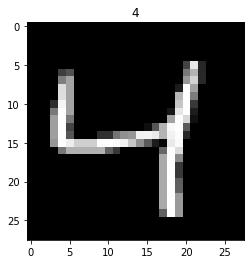

In [3]:
# Vizualizando imagens
plt.imshow(X_training[2], cmap = 'gray')
plt.title(y_training[2])

Text(0.5, 1.0, '4')

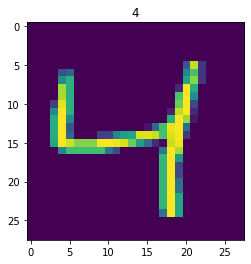

In [4]:
plt.imshow(X_training[2])
plt.title(y_training[2])

In [5]:
# Realizando rashape
X_training = X_training.reshape((len(X_training), np.prod(X_training.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [8]:
# Convertendo para float
X_training = X_training.astype('float32')
X_test = X_test.astype('float32')

In [9]:
# Normalizando dados, colocando os valores entre 0 e 1
X_training /= 255
X_test /= 255

In [10]:
# Fazendo One-Hot Encoding (Dummy variable)
y_training = np_utils.to_categorical(y_training, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [12]:
# Criando modelo de treinamento e teste
modelo = Sequential()

# Adicionando ao modelo camada oculta com 64 neurônios e 4 neurônios na camada de entrada
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))

# Adicionando ao modelo camada de drop-out
modelo.add(Dropout(0.2))

# Adicionando ao modelo camada oculta com 4 neurônios
modelo.add(Dense(units = 64, activation = 'relu'))

# Adicionando ao modelo camada de drop-out
modelo.add(Dropout(0.2))

# Adicionando ao modelo camada oculta com 4 neurônios
modelo.add(Dense(units = 64, activation = 'relu'))

# Adicionando ao modelo camada de drop-out
modelo.add(Dropout(0.2))

# Adicionando ao modelo camada de saída com 3 neurônios
modelo.add(Dense(units = 10, activation = 'softmax'))

In [13]:
# Resumo do modelo criado
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [14]:
# Compilando Rede Neural - ajuste dos pessos, cálculo de erros e resultado
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Treinando modelo
historico = modelo.fit(X_training, y_training, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9768 - accuracy: 0.6630 - val_loss: 0.4476 - val_accuracy: 0.8711
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5053 - accuracy: 0.8462 - val_loss: 0.3249 - val_accuracy: 0.9016
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3990 - accuracy: 0.8820 - val_loss: 0.2733 - val_accuracy: 0.9142
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3451 - accuracy: 0.8990 - val_loss: 0.2306 - val_accuracy: 0.9305
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3091 - accuracy: 0.9087 - val_loss: 0.2133 - val_accuracy: 0.9376
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2850 - accuracy: 0.9171 - val_loss: 0.1923 - val_accuracy: 0.9430
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2693 - accuracy: 0.9214 - val_loss: 0.1853 - val_accuracy:

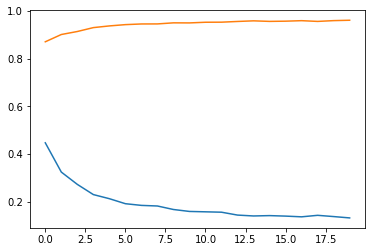

In [15]:
# Verificando resultados
historico.history.keys()
plt.plot(historico.history['val_loss'])
plt.plot(historico.history['val_accuracy'])

In [16]:
# Testando modelo
previsoes = modelo.predict(X_test)
previsoes

array([[1.1870578e-08, 2.3978919e-07, 1.4474537e-04, ..., 9.9977475e-01,
        2.8301343e-09, 2.3470944e-05],
       [1.9601005e-08, 7.5614822e-05, 9.9924445e-01, ..., 6.4360887e-07,
        1.4288064e-06, 6.6406001e-13],
       [2.7693670e-10, 9.9886811e-01, 1.3624993e-04, ..., 6.6982594e-04,
        2.0080975e-04, 1.9024635e-06],
       ...,
       [1.9564800e-06, 3.0241137e-07, 4.6737634e-05, ..., 1.5133826e-04,
        3.2949862e-05, 2.0228869e-03],
       [1.7295618e-09, 7.7068923e-10, 9.8330422e-10, ..., 3.8098198e-11,
        1.9545552e-05, 8.7023182e-06],
       [2.1879198e-07, 8.0933385e-11, 7.0830894e-05, ..., 5.9715900e-12,
        1.1951157e-08, 4.4419324e-13]], dtype=float32)

In [18]:
# Gerando matriz de confusão
y_test_matrix = [np.argmax(t) for t in y_test]
y_previsao_matrix = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_previsao_matrix, y_previsao_matrix)
confusao

array([[1018,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1146,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1047,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  995,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  898,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  960,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1025,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  965,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  964]])

In [19]:
# Previsão de um novo registro, convertendo o array para o formato de matriz, número 4
y_training[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
novo = X_training[20]
# Convertendo o array para o formato de matriz
novo = np.expand_dims(novo, axis = 0)
# Previsão
nova_previsao = modelo.predict(novo)
nova_previsao

array([[1.2542687e-05, 2.8067841e-05, 5.6333337e-03, 1.6486948e-06,
        9.8982531e-01, 4.6599605e-05, 2.2732904e-04, 1.7836720e-03,
        7.8435027e-05, 2.3631325e-03]], dtype=float32)

In [21]:
pred = [np.argmax(nova_previsao) for t in nova_previsao]
pred

[4]